# Project: Wrangling and Analyze Data

## Data Gathering


In [3883]:
import pandas as pd
import numpy as np
import os
import requests


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3864]:
# Read twitter_archive_enhanced.csv and load into dataframe
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
# with the Requests library, download the tweet image prediction file
folder_name = 'image_pediction'
if not os.path.exists(folder_name):
     os.makedirs(folder_name)
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(url)

# Save html to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [3865]:
# load into dataframe
image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

### Udacity provided tweet_json.txt 

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# df1 is a DataFrame with the twitter_archive_enhanced.csv file.
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3866]:
# Write each tweet to its own line, then read line by line into a pandas DataFrame.
lines = []
with open('tweet-json.txt') as file:
        for line in file:
            lines.append(json.loads(line))
            
field = ['id', 'retweet_count', 'favorite_count']
tweet_json = pd.DataFrame(lines, columns=field) 

## Assessing Data
I discovered that the 'Text' column also have ratings and url so i will expand the column to see th whole text

In [3867]:
# expand column width
pd.set_option('display.max_colwidth', None)

In [3868]:
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [3869]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

A lot of missing values in this table. tweet_id, timestamp & rating_numerator columns also have incorrect datatypes. Nulls represented as None in doggo, floofer, pupper and puppo columns.


In [3870]:
# rows with retweets
twit_arch[twit_arch['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp not needed(retweets)

In [3871]:
# filter out rows where expanded_urls isnull
twit_arch[twit_arch.filter(like='expanded_urls').isnull().any(1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [3872]:
sum(twit_arch.expanded_urls.isnull())

59

expanded_urls null rows

In [3873]:
twit_arch[twit_arch.filter(like='expanded_urls').isnull().any(1)].tweet_id

30      886267009285017600
55      881633300179243008
64      879674319642796034
113     870726314365509632
148     863427515083354112
179     857214891891077121
185     856330835276025856
186     856288084350160898
188     855862651834028034
189     855860136149123072
218     850333567704068097
228     848213670039564288
234     847617282490613760
274     840698636975636481
290     838150277551247360
291     838085839343206401
313     835246439529840640
342     832088576586297345
346     831926988323639298
375     828361771580813312
387     826598799820865537
409     823333489516937216
427     821153421864615936
498     813130366689148928
513     811647686436880384
570     801854953262350336
576     800859414831898624
611     797165961484890113
701     786051337297522688
707     785515384317313025
843     766714921925144576
857     763956972077010945
967     750381685133418496
1005    747651430853525504
1080    738891149612572673
1295    707983188426153984
1345    704491224099647488
1

In [3874]:
# check if the tweet_id exist in image_predict table
image_predict.tweet_id.sort_values()

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [3875]:
list(twit_arch.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [3876]:
twit_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [3877]:
twit_arch[twit_arch['name'].str.islower()].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713004314625/photo/1,10,10,a,None,None,None,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,doggo,None,pupper,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494439489536/photo/1,11,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12,10,a,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126856765440/photo/1,7,10,a,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=

In [3878]:
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3879]:
# checking further on rating_numerator column 
twit_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [3880]:
# checking rows with 0 and 75 rating
twit_arch.query('rating_numerator == 0 or rating_numerator == 75')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


Apart from the fact that index '340' and '695' has a wrong rating(saw it through the text column), index '340' has no image and it is also a retweet of index 695. It will be removed.
I also notice that tweet_id (746906459439529985) is not a dog rating. 

In [3881]:
# checking if tweet_id 832215909146226688 is in image_predict table
image_predict.query('tweet_id == 786709082849828864 or tweet_id == 832215909146226688')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


I don't think image_predict table has retweet

In [3882]:
# checking further on rating_numerator column 
twit_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [3797]:
# checking rows with 0 rating
twit_arch[twit_arch.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


same here tweet_id 835246439529840640 rating is incorrect. 960/0 instead of 13/10

In [3798]:
image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [3799]:
image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog value should be in two columns(prediction and dog breed)

In [3800]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


missing records. (2075 values instead of 2356)

In [3801]:
image_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
2005,877556246731214848,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1,basset,0.995368,True,Welsh_springer_spaniel,0.001936,True,bathtub,0.000468,False
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
893,699423671849451520,https://pbs.twimg.com/media/CbTaHrRW0AABXmG.jpg,1,pug,0.997860,True,French_bulldog,0.001825,True,bull_mastiff,0.000299,True
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
799,691321916024623104,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1,Rottweiler,0.508981,True,German_shepherd,0.207897,True,kelpie,0.094353,True
776,689661964914655233,https://pbs.twimg.com/media/CZIr5gFUsAAvnif.jpg,1,Italian_greyhound,0.322818,True,whippet,0.246966,True,Chihuahua,0.122541,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False


I notice that index 1033 has an image of a bear and p1_dog, p2_dog and p3_dog are all 'False'. So I looked further.

In [3802]:
# check the image of the condition "p1_dog, p2_dog and p3_dog equal false"
image_predict.query('p1_dog == False and p2_dog == False and p3_dog == False') 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


Some of the prediction in the image_predict table are not dog breeds. Checking the jpg_url, I saw that the image are of other things and animals.

In [3803]:
image_predict.duplicated().sum()

0

In [3804]:
image_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

Inconsistency in p1, p2 and p3. (The presence of underscores in the breed name, lowercase and uppercase) 

In [3805]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [3806]:
tweet_json.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [3807]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [3808]:
sum(tweet_json.retweet_count.isnull())

0

The id column name has a consistency issue and incorrect datatype. Apart from this, the table is clean.
Out of 2356 tweet, 2354 had retweet.

### Quality issues

##### `twit_arch` Table remains 
 1. Invalid name and Nulls represented as None in the name column
 2. Erroneous datatype (tweet_id, rating_numerator and timestamp column)
 3. Inaccurate rating_numerator. 9. was omitted (9.75 written as 75)
 4. Inaccurate rating_denominator and rating_numerator (960/0 instead of 13/10)
 5. Missing values represented as None in Doggo, floofer, pupper and puppo columns
 6. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp not needed(retweets and duplicate identifier).
 7. Expanded_urls column have NaN values. (The tweet_id don't exist in the image_predict table which also means they have no image therefore can be removed).
 8. text column is messy(ratings and urls attatched to it)
    
#####  `image_predict` Table   
1. tweet_id should be a string not integer
2. The presence of underscore in p1, p2 & p3 columns.
3. Lowercase dog breed names sometimes, uppercase other times

#####  `tweet_json` Table   
1. id column name instead of tweet_id
2. id column should be a string not integer


### Tidiness issues
1. One variable in Three columns( Doggo, floofer, pupper and puppo columns)

2. `image_predict` and `tweet_json` should be part of `twit_arch` table

3.  p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog value should be in two columns(prediction and dog breed) and img_num is not needed.
 

## Cleaning Data


In [3809]:
# Make copies of original pieces of data
twit_arch_clean = twit_arch.copy()
image_predict_clean = image_predict.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 

### `twit_arch` : One variable in Three columns( Doggo, floofer, pupper and puppo columns)

#### Define:  Merge Doggo, floofer, pupper and puppo columns into one column(dog_stage) by extracting its value from text column and drop the original four columns. None's will no longer be in the column.

#### Code

In [3810]:
# extracting dog_stage values from text column
twit_arch_clean['dog_stage'] = twit_arch_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# change the datatype to category
twit_arch_clean['dog_stage'] = twit_arch_clean['dog_stage'].astype('category')

# Drop these columns.
twit_arch_clean = twit_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [3811]:
twit_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Beebop. Her name means ""Good Dog"" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505180889089/photo/1,13,10,Beebop,NaN
1417,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Claude. He's trying to be seductive but he forgot to turn on the fireplace. 9/10 damn it Claude https://t.co/EPdQquc1dG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713696649216/photo/1,9,10,Claude,NaN
2242,667911425562669056,NaN,NaN,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10 https://t.co/SyMoWrp368,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667911425562669056/photo/1,5,10,None,NaN
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://t.co/Lu0ECu5tO5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1",13,10,None,pupper
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,pupper


In [3812]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

### Issue #2:
#### `tweet_json` : id column name instead of tweet_id

#### Define : Replace id with tweet_id using the rename function

#### Code

In [3813]:
tweet_json_clean = tweet_json_clean.rename(columns={'id' : 'tweet_id'})

#### Test

In [3814]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #3:
#### `image_predict` : The presence of underscore in p1, p2 & p3 columns.

#### Define : Replace underscores with space

#### Code

In [3815]:
image_predict_clean.p1 = image_predict_clean.p1.str.replace('_', ' ')
image_predict_clean.p2 = image_predict_clean.p2.str.replace('_', ' ')
image_predict_clean.p3 = image_predict_clean.p3.str.replace('_', ' ')

#### Test

In [3816]:
image_predict_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Issue #4:
#### `image_predict` : Lowercase dog breed names sometimes, uppercase other times

#### Define : Convert name to uppercase using `apply`

#### Code

In [3817]:
image_predict_clean['p1'] = image_predict_clean['p1'].apply(str.title)
image_predict_clean['p2'] = image_predict_clean['p2'].apply(str.title)
image_predict_clean['p3'] = image_predict_clean['p3'].apply(str.title)

#### Test

In [3818]:
image_predict_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Issue #5:
#### `twit_arch`: Expanded_urls column have NaN values

#### Define :Drop rows where expanded_urls is NaN have no image therefore can be removed).

#### Code

In [3819]:
twit_arch_clean = twit_arch_clean.dropna(subset=['expanded_urls'])

#### Test

In [3820]:
twit_arch_clean[twit_arch_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [3821]:
sum(twit_arch_clean.expanded_urls.isnull())

0

In [3822]:
# Inaccurate rating_numerator and rating_denominatornumerator (960/0 instead of 13/10)
twit_arch_clean[twit_arch_clean.rating_denominator == 0]
## this issue was solved as it has been removed because it has no expanded_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #6: 
#### `twit_arch`: Invalid name and Nulls represented as None in the name column

#### Define : Replace invalid name and None with nan

#### Code

In [3823]:
# check the unique Values
twit_arch_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [3824]:
twit_arch_clean[twit_arch_clean.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,NaN


In [3825]:
# I will replace  with its full name 
twit_arch_clean.name = twit_arch_clean.name.replace("O", "O'Malley")

In [3826]:
# check name not in uppercase(invalid name)
twit_arch_clean['name'].str.extractall(r'(\b[a-z]+\b)')[0].unique().tolist()

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [3827]:
# Replace all invalid name with nan
twit_arch_clean.name.replace(['space', 'light', 'life', 'officially', 'by', 'the', 'infuriating', 'old', 'all', 'unacceptable',
                             'getting', 'actually', 'incredibly', 'not', 'this', 'his', 'my', 'such', 'mad', 'a', 'very', 'an',
                             'one', 'just', 'quite', 'None'], np.nan, inplace=True)

In [3828]:
#check the number of null now in the name column
sum(twit_arch_clean['name'].isnull())

795

In [3829]:
# extract words after named into a new column(wordafter) 
twit_arch_clean = twit_arch_clean.assign(wordafter=twit_arch_clean.text.str.extract('((?<=named)\D+)'))

In [3830]:
# fill nan in name column using the first split word(the name) before the full stop
twit_arch_clean['name'] = twit_arch_clean['name'].fillna(twit_arch_clean['wordafter'].str.split('.', expand=True).pop(0))

# drop wordafter column
twit_arch_clean = twit_arch_clean.drop('wordafter', axis=1)

#### Test

In [3831]:
# Checking if 'O' is still in the name column
twit_arch_clean[twit_arch_clean.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [3832]:
sum(twit_arch_clean['name'].isnull())

771

In [3833]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2297 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2297 non-null   object  
 4   source                      2297 non-null   object  
 5   text                        2297 non-null   object  
 6   retweeted_status_id         180 non-null    float64 
 7   retweeted_status_user_id    180 non-null    float64 
 8   retweeted_status_timestamp  180 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2297 non-null   int64   
 11  rating_denominator          2297 non-null   int64   
 12  name                        1526 non-null   object  
 13  dog_stage         

### Issue #7:
#### `image_predict` :  p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog value should be in two columns(prediction and dog breed) and img_num is not needed.

#### Define : Create two new columns (prediction and dog breed) from p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. Then drop column p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog and img_num. 

#### code

In [3834]:
# iterate each row in the image_predict table
dog_breed = []
for index, row in image_predict_clean.iterrows():
    if row['p1_dog'] == 1:
        dog_breed.append(row['p1'])
    elif row['p2_dog'] == 1:
        dog_breed.append(row['p2'])
    elif row['p3_dog'] == 1:
        dog_breed.append(row['p3'])
    else:
        dog_breed.append(np.nan)
        
image_predict_clean['dog_breed'] = dog_breed 

In [3835]:
# iterate each row in the image_predict table
prediction_confi = []
for index, row in image_predict_clean.iterrows():
    if row['p1_dog'] == 1:
        prediction_confi.append(row['p1_conf'])
    elif row['p2_dog'] == 1:
        prediction_confi.append(row['p2_conf'])
    elif row['p3_dog'] == 1:
        prediction_confi.append(row['p3_conf'])
    else:
        prediction_confi.append(np.nan)
        
image_predict_clean['prediction_confi'] = prediction_confi  

In [3836]:
# Drop columns
image_predict_clean = image_predict_clean.drop(columns =['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [3837]:
image_predict_clean

,tweet_id,jpg_url,dog_breed,prediction_confi
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [3838]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   dog_breed         1751 non-null   object 
 3   prediction_confi  1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


prediction_confidence column has 1751 non-null, which means that 324 images are not dog's image

### Issue #8:
#### image_predict and tweet_json should be part of twit_arch table

#### Define : Merge the image_predict and tweet_json tables to the twit_arch table  joining on tweet_id.

#### Code

In [3839]:
twit_arch_clean = pd.merge(twit_arch_clean, image_predict_clean, on= ['tweet_id'], how='left')

twit_arch_clean = pd.merge(twit_arch_clean, tweet_json_clean, on= ['tweet_id'], how='left')

#### Test

In [3840]:
twit_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,prediction_confi,retweet_count,favorite_count
982,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,NaN,NaN,336.0,3168.0
1668,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I hope everyone enjoys this picture as much as I do. This is Toby. 12/10 https://t.co/vHnu1g9EJm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703334408192/photo/1,12,10,Toby,NaN,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,NaN,NaN,1323.0,3115.0
611,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262322548741/photo/1,12,10,NaN,NaN,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,Basset,0.207622,9714.0,22350.0
674,785927819176054784,NaN,NaN,2016-10-11 19:39:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's strives to be the best potato she can be. 12/10 would boop https://t.co/lntsj7Fc4Y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785927819176054784/photo/1,12,10,Lucy,NaN,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,Toy Poodle,0.008493,3652.0,12696.0
652,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Lucy. She destroyed not one, but two remotes trying to turn off the debate. 11/10 relatable af https://t.co/3BXh073tDm",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386943430656/photo/1,11,10,Lucy,NaN,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,Golden Retriever,0.034090,14409.0,30653.0


In [3841]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2297 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2297 non-null   object  
 4   source                      2297 non-null   object  
 5   text                        2297 non-null   object  
 6   retweeted_status_id         180 non-null    float64 
 7   retweeted_status_user_id    180 non-null    float64 
 8   retweeted_status_timestamp  180 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2297 non-null   int64   
 11  rating_denominator          2297 non-null   int64   
 12  name                        1526 non-null   object  
 13  dog_stage         

### Issue #9:
#### `twit_arch` : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp not needed(retweets and duplicate identifier).

#### Define: Remove  rows with retweets, then drop the columns related to retweet, tweet reply and other identifier

#### Code

In [3842]:
# delete rows with retweets.
twit_arch_clean = twit_arch_clean[twit_arch_clean['retweeted_status_id'].isnull()]

In [3843]:
# drop the columns
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twit_arch_clean = twit_arch_clean.drop(columns = cols, axis=1)

#### Test

In [3844]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2117 non-null   int64   
 1   timestamp           2117 non-null   object  
 2   source              2117 non-null   object  
 3   text                2117 non-null   object  
 4   expanded_urls       2117 non-null   object  
 5   rating_numerator    2117 non-null   int64   
 6   rating_denominator  2117 non-null   int64   
 7   name                1414 non-null   object  
 8   dog_stage           356 non-null    category
 9   jpg_url             1994 non-null   object  
 10  dog_breed           1686 non-null   object  
 11  prediction_confi    1686 non-null   float64 
 12  retweet_count       2117 non-null   float64 
 13  favorite_count      2117 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(7)
memory usage: 233.8+ KB


### Issue #10:
#### `twit_arch` : Erroneous datatype (tweet_id, rating_numerator and timestamp column)

#### Define : convert to the appropriate datatype

#### Code

In [3845]:
# convert from integer to string
twit_arch_clean['tweet_id'] = twit_arch_clean['tweet_id'].astype(str)

# convert from integer data type to float
twit_arch_clean['rating_numerator'] = twit_arch_clean['rating_numerator'].astype(float)

# convert timestamp to datetime
twit_arch_clean['timestamp'] = pd.to_datetime(twit_arch_clean['timestamp'])

# data type was converted to float by pandas. I converted it back to int64
twit_arch_clean['favorite_count'] = twit_arch_clean['favorite_count'].astype('int64')
twit_arch_clean['retweet_count'] = twit_arch_clean['retweet_count'].astype('int64')

#### Test

In [3846]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   float64            
 6   rating_denominator  2117 non-null   int64              
 7   name                1414 non-null   object             
 8   dog_stage           356 non-null    category           
 9   jpg_url             1994 non-null   object             
 10  dog_breed           1686 non-null   object             
 11  prediction_confi    1686 non-null   float64            
 12  retweet_count       2117 non-null 

### Issue #11:
#### `twit_arch` : Inaccurate rating_numerator. 9. was omitted (9.75 written as 75)

#### Define : replace rating_numerator 75 with 9.75

#### Code

In [3847]:
# replace rating_numerator 75 with 9.75
twit_arch_clean.rating_numerator = twit_arch_clean.rating_numerator.replace(75, 9.75) 

#### Test

In [3848]:
# Checking if rating_numerator 75 is still in  column
twit_arch_clean[twit_arch_clean.rating_numerator == 75] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,prediction_confi,retweet_count,favorite_count


### Issue #12:
#### `twit_arch` : text column is messy(ratings and urls attatched to it)
 

#### Define :  Extract text from the column using regular expression.

#### Code

In [3849]:
twit_arch_clean.text = twit_arch_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')

#### Test

In [3850]:
twit_arch_clean[['tweet_id', 'text']]

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit."
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.
3,891689557279858688,This is Darla. She commenced a snooze mid meal.
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such."
...,...,...
2292,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.
2293,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron.
2294,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue.
2295,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here.


## Storing Data


In [3851]:
df = twit_arch_clean.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Tweets with less retweet count and favorite count are more than Tweets with high retweet count
2. favorite tweets has the highest tweet counts(People likes tweet more than they retweet a tweet)
3. As the number of tweet retweeted increases, so also the number of favorite tweets. 

4. Labrador Retriever has the maximum retweet count with the prediction confident of 0.8 and a rating of 13
5. The dog breed(English Setter) with the lowest retweet count has a low prediction score 0.3 and a rating of 11

6. There is strong positive correlation between retweet count and favorite count.

7. The most common dog stage is pupper while the least common is floofer





### Visualization

#### A. Plot a graph to evaluate tweets trend

With the 95th percentile of the favorite count and retweet count to plot a hist graph to evaluate tweets popularity

In [3852]:
percentile = twit_arch_clean.describe([0.95])
fav_cap = percentile['favorite_count']['95%']

ret_cap = percentile['retweet_count']['95%']

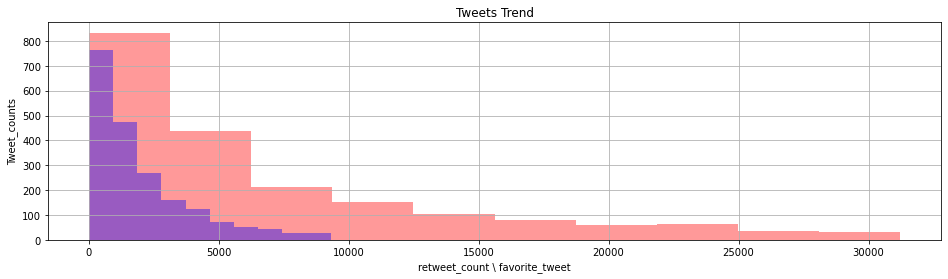

In [3853]:
def popularity(twit_arch_clean, retweet_count, favorite_count):
        
    plt.figure(figsize=[16,4])
    data = twit_arch_clean['favorite_count'][twit_arch_clean['favorite_count'] < fav_cap]
    data_two = twit_arch_clean['retweet_count'][twit_arch_clean['retweet_count'] < ret_cap]
    data.hist(alpha = .4, bins = 10, color = 'red', range = [0, fav_cap])
    data_two.hist(alpha = .4, bins = 10, color = 'blue', range = [0, ret_cap])
 
    plt.title("Tweets Trend")
    plt.xlabel("retweet_count \ favorite_tweet")
    plt.ylabel("Tweet_counts")
popularity(twit_arch_clean, 'retweet_count', 'favorite_count')

- Tweets with less retweet count and favorite count are more than Tweets with high retweet count
- favorite tweets has the highest tweet counts(People likes tweet more than they retweet a tweet)
- As the number of tweet retweeted increases, so also the number of favorite tweets. 

#### B. Dog breed with the maximum and minimum retweet_count

In [3884]:
ret_data = twit_arch_clean[(twit_arch_clean.retweet_count == twit_arch_clean['retweet_count'].max())|(twit_arch_clean.retweet_count == twit_arch_clean['retweet_count'].min())]

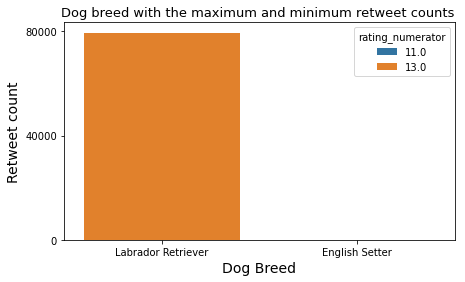

In [3885]:
plt.figure(figsize=(7,4))
#bargraph that shows the max and min retweet_count
sns.barplot(y="retweet_count", x="dog_breed", data=ret_data, hue="rating_numerator", dodge=False)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Retweet count', fontsize=14)
plt.title('Dog breed with the maximum and minimum retweet counts ', fontsize=13)

plt.yticks([0,40000,80000]);
plt.show()

Let see if they are dogs

In [3857]:
ret_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,prediction_confi,retweet_count,favorite_count
1005,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool.,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador Retriever,0.825333,79515,131075
2280,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place.,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11.0,10,NaN,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English Setter,0.298617,16,81


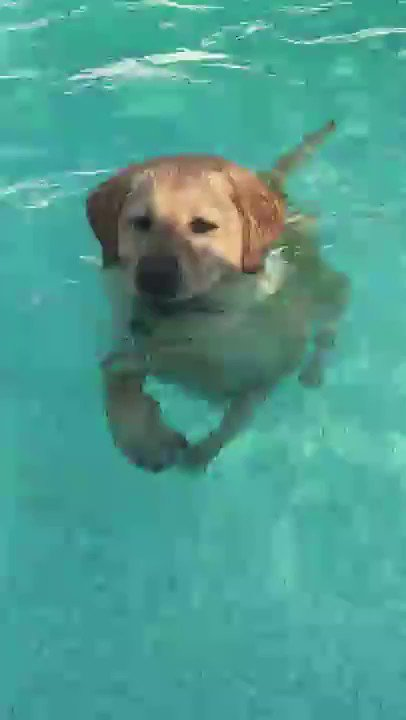

In [3858]:
# image of the dog breed with the highest retweet_count(79515)
Image('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

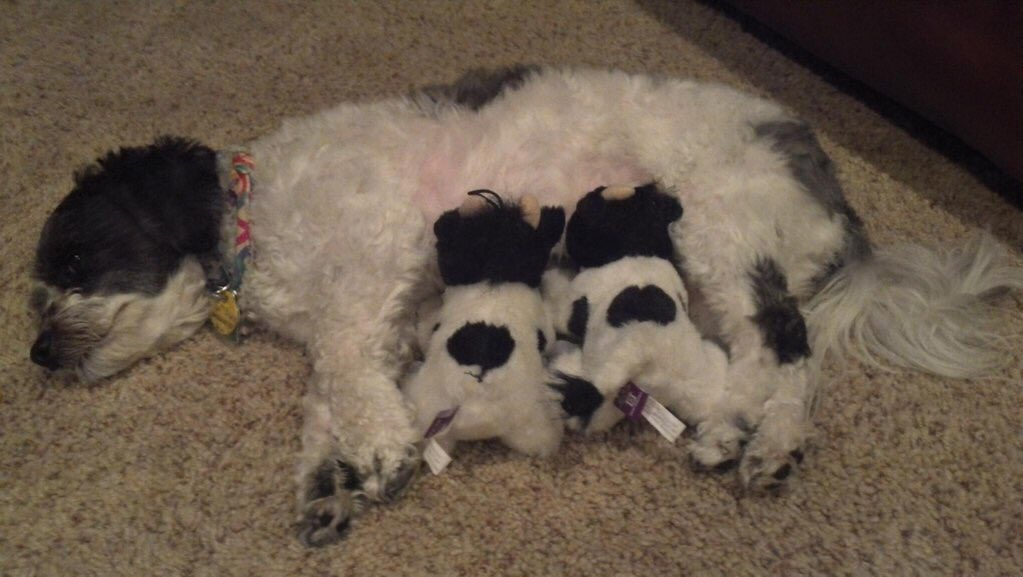

In [3859]:
# # image of the dog breed with the lowest retweet_count(16)
Image('https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg')

- Labrador Retriever has the maximum retweet count with the prediction confident of 0.8 and a rating of 13
- The dog breed(English Setter) with the lowest retweet count has a low prediction score 0.3 and a rating of 11

  (Both dog have no name)

#### C. Plot a scatter plot graph to visualize the relationship between retweet_count and  favorite_count

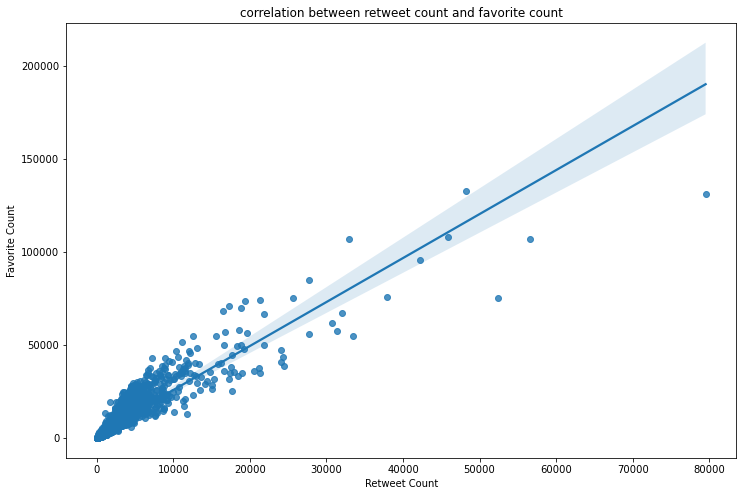

In [3860]:
plt.figure(figsize=(12,8))
sns.regplot(x=twit_arch_clean["retweet_count"], y=twit_arch_clean["favorite_count"])
plt.title('correlation between retweet count and favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

plt.show()

- There is strong positive correlation between retweet count and favorite count.

#### D. The most commonly used dog_stage

In [3861]:
pop_dog_stage = twit_arch_clean['dog_stage'].value_counts()

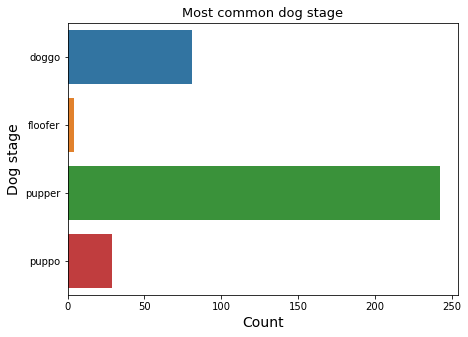

In [3862]:
plt.figure(figsize=(7,5))
sns.barplot(y=pop_dog_stage.index, x=pop_dog_stage.values, dodge=False)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog stage', fontsize=14)
plt.title('Most common dog stage', fontsize=13)

plt.show()

- The most common dog stage is pupper while the least common is floofer

### References

- Udacity Data Wrangling
- https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
- https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
- https://pandas.pydata.org/docs/user_guide/text.html
- https://stackoverflow.com/questions/27387415/how-would-i-get-everything-before-a-in-a-string-python
- https://stackoverflow.com/questions/68461514/find-words-before-and-after-a-matched-keyword-between-two-pandas-dataframe-colum
- https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas